In [809]:
import numpy as np
import pandas as pd

In [810]:
df = pd.read_csv('spam.csv', encoding='latin-1', header=None)

In [811]:
df.sample(5)

,0,1,2,3,4
1679,ham,So many people seems to be special at first si...,NaN,NaN,NaN
4283,ham,Science tells that chocolate will melt under t...,NaN,NaN,NaN
4619,ham,"Sorry, I'll call later In meeting.",NaN,NaN,NaN
636,ham,Me n him so funny...,NaN,NaN,NaN
3600,ham,I know you mood off today,NaN,NaN,NaN


In [812]:
df.shape

(5573, 5)

# Data Cleaning

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5573 non-null   object
 1   1       5573 non-null   object
 2   2       50 non-null     object
 3   3       12 non-null     object
 4   4       6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [815]:
# Drop the last 3 cols
df.drop(columns = [2,3,4],inplace = True)

In [816]:
df.sample(5)

,0,1
302,ham,"Shit that is really shocking and scary, cant i..."
751,spam,"Do you realize that in about 40 years, we'll h..."
3206,ham,At home also.
4916,ham,"Just dropped em off, omw back now"
9,spam,WINNER!! As a valued network customer you have...


In [817]:
# Rename the columns
df.rename(columns = {0:'target', 1 :'text'},inplace=True)
df.sample(5)

,target,text
584,ham,my ex-wife was not able to have kids. Do you w...
1912,ham,Lol grr my mom is taking forever with my presc...
1498,ham,I'm putting it on now. It should be ready for ...
2476,ham,Mm i am on the way to railway
2718,ham,Okie.. Thanx..


In [818]:
print(df['target'].unique())

['v1' 'ham' 'spam']


In [819]:
#I drop the the v1 category as we dont want this in our dataset.
df = df[df['target'] != 'v1']

In [820]:
#Encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [821]:
df['target'] = encoder.fit_transform(df['target'])

C:\Users\xaris\AppData\Local\Temp\ipykernel_22048\1103932564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [822]:
df.head()

,target,text
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."


In [823]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [824]:
# Chech for duplicate values
df.duplicated().sum()

403

In [825]:
# remove duplicated
df = df.drop_duplicates(keep = 'first')

In [826]:
df.duplicated().sum()

0

# EDA

In [828]:
df['target']

1       0
2       0
3       1
4       0
5       0
       ..
5568    1
5569    0
5570    0
5571    0
5572    0
Name: target, Length: 5169, dtype: int32

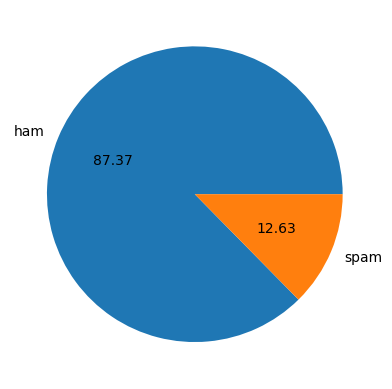

In [829]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'],autopct= '%0.2f')
plt.show()

In [830]:
import nltk 
!pip install nltk

In [831]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [832]:
df['num_charachters'] = df['text'].apply(len)

In [833]:
df.head()

,target,text,num_charachters
1,0,"Go until jurong point, crazy.. Available only ...",111
2,0,Ok lar... Joking wif u oni...,29
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,0,U dun say so early hor... U c already then say...,49
5,0,"Nah I don't think he goes to usf, he lives aro...",61


In [834]:
#number of words 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [835]:
#Number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [836]:
df.head()

,target,text,num_charachters,num_words,num_sentences
1,0,"Go until jurong point, crazy.. Available only ...",111,24,2
2,0,Ok lar... Joking wif u oni...,29,8,2
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
4,0,U dun say so early hor... U c already then say...,49,13,1
5,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [837]:
# Num of charachters
df[['num_charachters', 'num_words',	'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [838]:
#ham messages
df[df['target'] == 0][['num_charachters', 'num_words',	'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [839]:
#Spam
df[df['target'] == 1][['num_charachters', 'num_words',	'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [840]:
import seaborn as sns

<Axes: xlabel='num_charachters', ylabel='Count'>

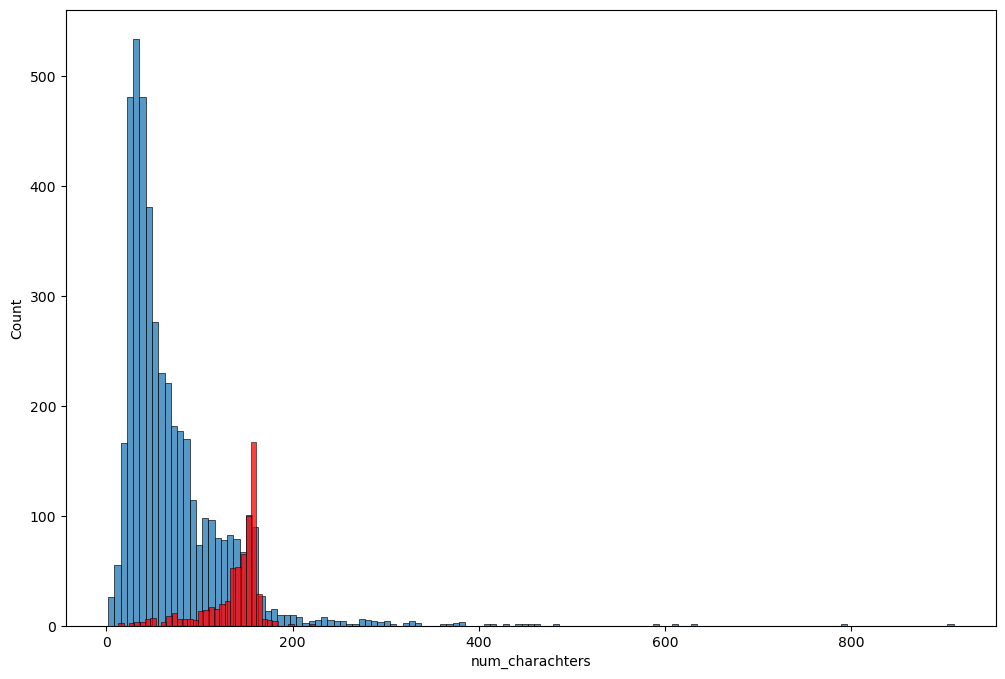

In [841]:
#Number of charachters per group
plt.figure(figsize = (12,8))
sns.histplot(df[df['target']==0]['num_charachters'])
sns.histplot(df[df['target']==1]['num_charachters'],color= 'red')

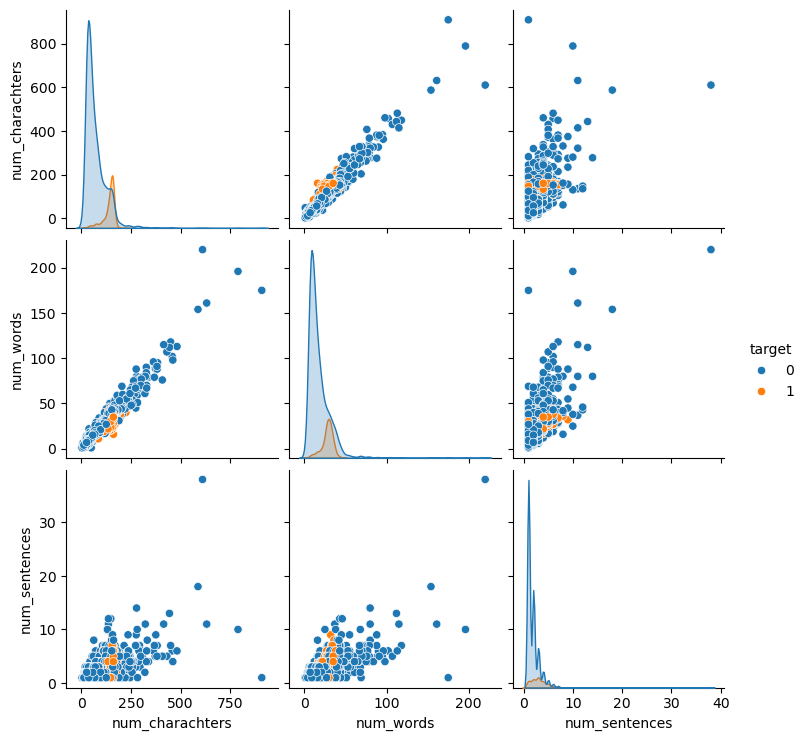

In [842]:
sns.pairplot(df,hue='target')

<Axes: >

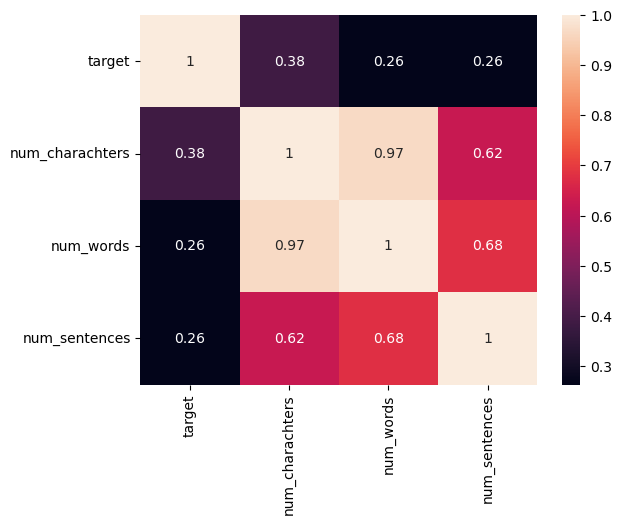

In [843]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Data preprocessing 
* Lower case
* Tokenization
* Removing Special Charachters
* Removing stop words and punctuation
* Stemming

In [845]:
#Let s make a funtion to transform our text 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
              y.append(i)  
            
    text = y[:]
    y.clear()
    
    for i in text:
            y.append(ps.stem(i))
            
    return " ".join(y)   # Join back to string

In [846]:
transform_text('Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030')

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [847]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [848]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [849]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [850]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [851]:
df['transformed_text'] = df['text'].apply(transform_text)

In [852]:
df.head()

,target,text,num_charachters,num_words,num_sentences,transformed_text
1,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
2,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
4,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
5,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [853]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size = 10, background_color = 'white')

In [854]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [855]:
#In the next picture we can see the most common spam words
plt.figure(figsize = (12,6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

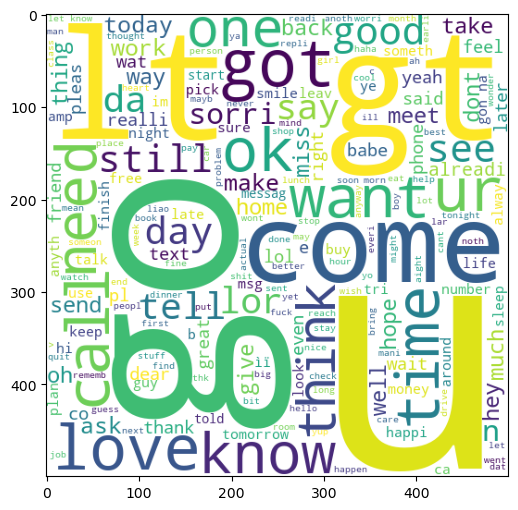

In [856]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
#In the next picture we can see the most common ham words
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [857]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [858]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

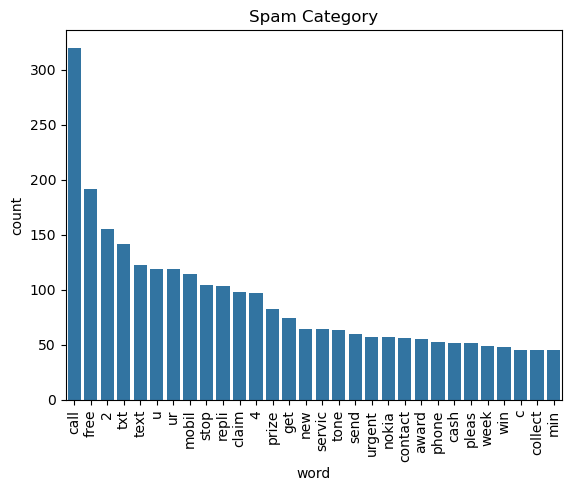

In [859]:
from collections import Counter
# Create DataFrame from Counter
most_common = Counter(spam_corpus).most_common(30)
bf = pd.DataFrame(most_common, columns=['word', 'count'])

# Plot with seaborn
sns.barplot(x='word', y='count', data=bf)
plt.xticks(rotation='vertical')
plt.title("Spam Category")
plt.show()

In [860]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

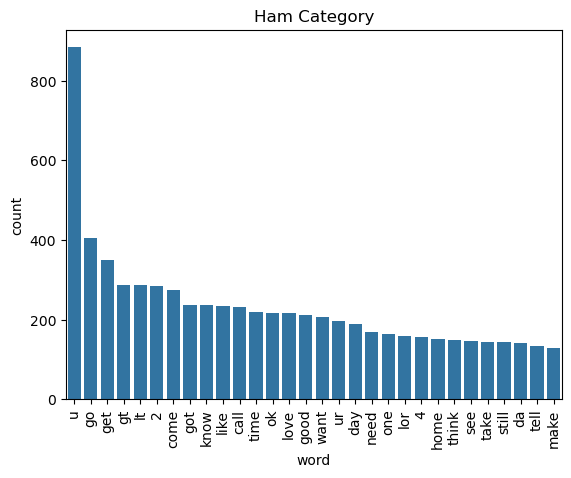

In [861]:
# Create DataFrame from ham Counter
most_common = Counter(ham_corpus).most_common(30)
bf = pd.DataFrame(most_common, columns=['word', 'count'])

# Plot with seaborn
sns.barplot(x='word', y='count', data=bf)
plt.xticks(rotation='vertical')
plt.title('Ham Category')
plt.show()

In [862]:
df.head()

,target,text,num_charachters,num_words,num_sentences,transformed_text
1,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
2,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
4,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
5,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [864]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [865]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # we convert to array since in ML training model we use array

In [866]:
X.shape

(5169, 6708)

In [867]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [868]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, precision_recall_fscore_support
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 2)

In [869]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [870]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [871]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [1058]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [937]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#So tfidb vectorizer is better than CV vectorizer. Apart from that we choose the Multinomial Naive Bayes as is has the biggest precision score.

In [948]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
fro
m sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
%pip install xgboost
from xgboost import XGBClassifier

Note: you may need to restart the kernel to use updated packages.


In [1025]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(penalty = 'l1',solver='liblinear')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [1027]:
#Let s just make a dictionary in order to organize all of the ML classification algorithms
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [1029]:
#Lets make the follow function in order to automate the procedure of training the model
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    return accuracy, precision

In [1031]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For ', name)
    print('Accuracy -', current_accuracy)
    print('Precision -', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For  KN
Accuracy - 0.9003868471953579
Precision - 1.0
For  NB
Accuracy - 0.9593810444874274
Precision - 1.0
For  DT
Accuracy - 0.937137330754352
Precision - 0.8543689320388349
For  LR
Accuracy - 0.9516441005802708
Precision - 0.94
For  RF
Accuracy - 0.971953578336557
Precision - 1.0


C:\Users\xaris\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For  Bgc
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For  ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For  GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For  xgb
Accuracy - 0.9748549323017408
Precision - 0.9516129032258065


In [1034]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [1042]:
performance_df.sort_values('Precision',ascending = False)

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595


In [1062]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))